# ここにまとめること
- BigFiveに関するアンケートデータを対象に基礎分析する
    - update: 11/8/2018
    - description: Answers to the [IPIP Big Five Factor Markers](https://openpsychometrics.org/tests/IPIP-BFFM/).
    - variables: 50 items, and technical information	
    - N: 1,015,342	
    - data: [IPIP-FFM-data-8Nov2018.zip](https://openpsychometrics.org/_rawdata/IPIP-FFM-data-8Nov2018.zip)

## ライブラリ読み込み

In [26]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import os
import seaborn as sns
import gc
%matplotlib inline
%config IPCompleter.greedy=True
sns.set(style="darkgrid", palette="muted", color_codes=True)
plt.rcParams['font.family'] = 'IPAexGothic'

## データ読み込み

### データ定義

```
The following items were presented on one page and each was rated on a five point scale using radio buttons. The order on page was was EXT1, AGR1, CSN1, EST1, OPN1, EXT2, etc.  
(EXT=extraversion/外向性, EST=neuroticism/神経性, AGR=agreeableness/快楽性, CSN=conscientiousness/誠実性, OPN=openness to experience/開放性)  
The scale was labeled 1=Disagree, 3=Neutral, 5=Agree  

EXT1	I am the life of the party.  
EXT2	I don't talk a lot.  
EXT3	I feel comfortable around people.  
EXT4	I keep in the background.  
EXT5	I start conversations.  
EXT6	I have little to say.  
EXT7	I talk to a lot of different people at parties.  
EXT8	I don't like to draw attention to myself.  
EXT9	I don't mind being the center of attention.  
EXT10	I am quiet around strangers.  
EST1	I get stressed out easily.  
EST2	I am relaxed most of the time.  
EST3	I worry about things.  
EST4	I seldom feel blue.  
EST5	I am easily disturbed.  
EST6	I get upset easily.  
EST7	I change my mood a lot.  
EST8	I have frequent mood swings.  
EST9	I get irritated easily.  
EST10	I often feel blue.  
AGR1	I feel little concern for others.  
AGR2	I am interested in people.  
AGR3	I insult people.  
AGR4	I sympathize with others' feelings.  
AGR5	I am not interested in other people's problems.  
AGR6	I have a soft heart.  
AGR7	I am not really interested in others.  
AGR8	I take time out for others.  
AGR9	I feel others' emotions.  
AGR10	I make people feel at ease.  
CSN1	I am always prepared.  
CSN2	I leave my belongings around.  
CSN3	I pay attention to details.  
CSN4	I make a mess of things.  
CSN5	I get chores done right away.  
CSN6	I often forget to put things back in their proper place.  
CSN7	I like order.  
CSN8	I shirk my duties.  
CSN9	I follow a schedule.  
CSN10	I am exacting in my work.  
OPN1	I have a rich vocabulary.  
OPN2	I have difficulty understanding abstract ideas.  
OPN3	I have a vivid imagination.  
OPN4	I am not interested in abstract ideas.  
OPN5	I have excellent ideas.  
OPN6	I do not have a good imagination.  
OPN7	I am quick to understand things.  
OPN8	I use difficult words.  
OPN9	I spend time reflecting on things.  
OPN10	I am full of ideas.  

The time spent on each question is also recorded in milliseconds. These are the variables ending in _E. This was calculated by taking the time when the button for the question was clicked minus the time of the most recent other button click.  

dateload    The timestamp when the survey was started.  
screenw     The width the of user's screen in pixels  
screenh     The height of the user's screen in pixels  
introelapse The time in seconds spent on the landing / intro page  
testelapse  The time in seconds spent on the page with the survey questions  
endelapse   The time in seconds spent on the finalization page (where the user was asked to indicate if they has answered accurately and their answers could be stored and used for research. Again: this dataset only includes users who answered "Yes" to this question, users were free to answer no and could still view their results either way)  

IPC         The number of records from the user's IP address in the dataset. For max cleanliness, only use records where this value is 1. High values can be because of shared networks (e.g. entire universities) or multiple submissions  

country     The country, determined by technical information (NOT ASKED AS A QUESTION)  

lat_appx_lots_of_err    approximate latitude of user. determined by technical information, THIS IS NOT VERY ACCURATE. Read the article "How an internet mapping glitch turned a random Kansas farm into a digital hell" https://splinternews.com/how-an-internet-mapping-glitch-turned-a-random-kansas-f-1793856052 to learn about the perils of relying on this information  

long_appx_lots_of_err   approximate longitude of user
```

### 日本人の回答に限定して読み込み

In [14]:
df_raw = pd.read_csv('./data/data-final.csv', delimiter='\t', nrows=None)
df = df_raw[df_raw['country'] == 'JP']
del df_raw
gc.collect()  
df

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,dateload,screenw,screenh,introelapse,testelapse,endelapse,IPC,country,lat_appx_lots_of_err,long_appx_lots_of_err
235,3.0,2.0,4.0,2.0,4.0,4.0,4.0,2.0,3.0,2.0,...,2016-03-03 05:59:08,768.0,1024.0,70.0,458.0,15,1,JP,35.69,139.69
1374,3.0,5.0,2.0,2.0,1.0,4.0,1.0,2.0,2.0,5.0,...,2016-03-03 22:25:35,1301.0,731.0,3.0,1093.0,14,1,JP,35.69,139.69
1480,3.0,3.0,4.0,1.0,4.0,1.0,4.0,1.0,5.0,3.0,...,2016-03-04 00:33:53,1366.0,768.0,38.0,179.0,9,1,JP,35.69,139.69
2634,1.0,3.0,2.0,5.0,2.0,2.0,1.0,5.0,1.0,5.0,...,2016-03-04 18:53:57,1440.0,900.0,1171.0,190.0,9,1,JP,35.7167,140.65
2830,2.0,3.0,3.0,4.0,3.0,4.0,2.0,4.0,2.0,3.0,...,2016-03-05 00:06:57,360.0,640.0,2.0,134.0,6,1,JP,35.69,139.69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1013550,1.0,4.0,3.0,3.0,1.0,2.0,1.0,5.0,1.0,5.0,...,2018-11-07 17:32:31,1920.0,1080.0,14.0,277.0,9,1,JP,35.69,139.69
1013859,4.0,1.0,5.0,2.0,5.0,1.0,4.0,4.0,3.0,2.0,...,2018-11-07 20:55:21,962.0,601.0,17.0,236.0,24,1,JP,35.69,139.69
1013897,4.0,1.0,2.0,5.0,5.0,1.0,5.0,2.0,2.0,5.0,...,2018-11-07 21:24:07,1280.0,800.0,3.0,596.0,12,1,JP,35.685,139.7514
1014009,3.0,1.0,4.0,2.0,4.0,4.0,2.0,3.0,5.0,2.0,...,2018-11-07 23:44:46,375.0,812.0,4.0,202.0,11,1,JP,35.69,139.69


In [37]:
# 表示カラム数を引き上げ
pd.set_option('display.max_columns', 200)

In [38]:
df.describe()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10,EXT1_E,EXT2_E,EXT3_E,EXT4_E,EXT5_E,EXT6_E,EXT7_E,EXT8_E,EXT9_E,EXT10_E,EST1_E,EST2_E,EST3_E,EST4_E,EST5_E,EST6_E,EST7_E,EST8_E,EST9_E,EST10_E,AGR1_E,AGR2_E,AGR3_E,AGR4_E,AGR5_E,AGR6_E,AGR7_E,AGR8_E,AGR9_E,AGR10_E,CSN1_E,CSN2_E,CSN3_E,CSN4_E,CSN5_E,CSN6_E,CSN7_E,CSN8_E,CSN9_E,CSN10_E,OPN1_E,OPN2_E,OPN3_E,OPN4_E,OPN5_E,OPN6_E,OPN7_E,OPN8_E,OPN9_E,OPN10_E,screenw,screenh,introelapse,testelapse,endelapse,IPC
count,1933.000000,1933.000000,1933.000000,1933.000000,1933.000000,1933.000000,1933.00000,1933.000000,1933.000000,1933.000000,1933.000000,1933.000000,1933.000000,1933.000000,1933.000000,1933.000000,1933.000000,1933.000000,1933.000000,1933.000000,1933.000000,1933.000000,1933.000000,1933.000000,1933.000000,1933.000000,1933.000000,1933.000000,1933.000000,1933.000000,1933.000000,1933.000000,1933.000000,1933.000000,1933.000000,1933.000000,1933.000000,1933.000000,1933.000000,1933.000000,1933.000000,1933.000000,1933.000000,1933.000000,1933.000000,1933.000000,1933.000000,1933.000000,1933.000000,1933.000000,1.933000e+03,1933.000000,1.933000e+03,1.933000e+03,1.933000e+03,1933.000000,1.933000e+03,1933.000000,1.933000e+03,1933.000000,1.933000e+03,1933.000000,1933.000000,1.933000e+03,1933.000000,1.933000e+03,1.933000e+03,1933.000000,1933.000000,1933.000000,1.933000e+03,1.933000e+03,1.933000e+03,1.933000e+03,1.933000e+03,1933.000000,1933.000000,1933.000000,1933.000000,1933.000000,1.933000e+03,1933.000000,1.933000e+03,1.933000e+03,1933.000000,1.933000e+03,1933.000000,1933.000000,1933.000000,1933.000000,1933.000000,1.933000e+03,1933.000000,1933.000000,1933.000000,1.933000e+03,1933.000000,1933.000000,1933.000000,1.933000e+03,1933.000000,1933.000000,1933.000000,1933.000000,1.933000e+03,1933.000000
mean,2.560269,2.807036,3.136575,3.166580,3.216762,2.466115,2.70926,3.230729,3.037765,3.515779,3.170202,3.153130,3.715468,2.656492,2.929643,2.806001,2.981893,2.683394,2.967408,2.812726,2.508536,3.713399,2.308846,3.776513,2.458872,3.560786,2.391619,3.473357,3.696327,3.452664,3.150543,2.974133,3.753751,2.726332,2.550957,2.978272,3.471805,2.495085,3.107087,3.514227,3.551474,2.042938,3.924987,1.932230,3.609933,1.974133,3.864459,3.107605,4.031557,3.809105,9.410318e+04,5340.751164,9.753818e+03,1.089015e+04,6.931188e+03,4801.907398,8.470947e+03,7131.693223,1.073755e+04,5752.457320,9.372631e+03,5929.289188,4154.351785,7.088336e+03,7547.523539,8.346341e+03,6.817555e+03,5855.469219,4786.350233,3962.707708,9.945470e+03,5.661574e+03,9.856513e+03,7.973855e+03,1.019523e+04,5116.097775,5799.313502,6950.486291,5202.753233,5802.754268,8.193901e+03,8908.816865,6.764038e+03,1.090144e+04,8275.281428,1.041330e+04,5058.480600,10428.765132,4179.353854,7525.907398,4940.140714,1.908673e+04,5626.118986,6591.037765,5097.204863,1.488093e+04,5535.860321,4323.566477,7069.079669,1.563202e+04,1100.241593,831.212623,538.827729,653.565442,5.536066e+03,2.718572
std,1.223102,1.305155,1.195649,1.206513,1.277326,1.250472,1.36857,1.286395,1.322728,1.301132,1.322876,1.186683,1.191652,1.288167,1.246202,1.308961,1.289463,1.323118,1.304346,1.326628,1.327584,1.175849,1.284285,1.134681,1.201272,1.223499,1.174819,1.131123,1.148575,1.137293,1.169663,1.374251,1.136808,1.261844,1.268799,1.407442,1.179034,1.178922,1.247530,1.085110,1.230254,1.110704,1.117831,1.069559,1.110343,1.119354,1.088356,1.298912,1.093240,1.123013,2.040115e+06,11752.715217,1.326774e+05,1.520834e+05,8.603920e+04,10351.710726,9.180503e+04,24277.091622,2.150231e+05,10963.488154,1.442718e+05,12245.355404,5875.099036,3.269041e+04,25180.664085,1.047930e+05,7.630596e+04,9442.866811,10586.556690,5776.935627,4.874353e+04,3.092328e+04,1.174858e+05,8.718325e+04,1.724755e+05,15430.478587,10007.063467,12903.189747,13651.937958,14182.124956,7.885850e+04,24383.074166,3.955295e+04,1.765397e+05,

### データ確認

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1933 entries, 235 to 1014166
Columns: 110 entries, EXT1 to long_appx_lots_of_err
dtypes: float64(104), int64(2), object(4)
memory usage: 1.6+ MB


In [40]:
df.isnull().sum()

EXT1                     0
EXT2                     0
EXT3                     0
EXT4                     0
EXT5                     0
EXT6                     0
EXT7                     0
EXT8                     0
EXT9                     0
EXT10                    0
EST1                     0
EST2                     0
EST3                     0
EST4                     0
EST5                     0
EST6                     0
EST7                     0
EST8                     0
EST9                     0
EST10                    0
AGR1                     0
AGR2                     0
AGR3                     0
AGR4                     0
AGR5                     0
AGR6                     0
AGR7                     0
AGR8                     0
AGR9                     0
AGR10                    0
CSN1                     0
CSN2                     0
CSN3                     0
CSN4                     0
CSN5                     0
CSN6                     0
CSN7                     0
C

In [41]:
df.nunique()

EXT1                        6
EXT2                        6
EXT3                        6
EXT4                        6
EXT5                        6
EXT6                        6
EXT7                        6
EXT8                        6
EXT9                        6
EXT10                       6
EST1                        6
EST2                        6
EST3                        6
EST4                        6
EST5                        6
EST6                        6
EST7                        6
EST8                        6
EST9                        6
EST10                       6
AGR1                        6
AGR2                        6
AGR3                        6
AGR4                        6
AGR5                        6
AGR6                        6
AGR7                        6
AGR8                        6
AGR9                        6
AGR10                       6
CSN1                        6
CSN2                        6
CSN3                        6
CSN4      

### 相関分析

#### 全カラム 相関分析

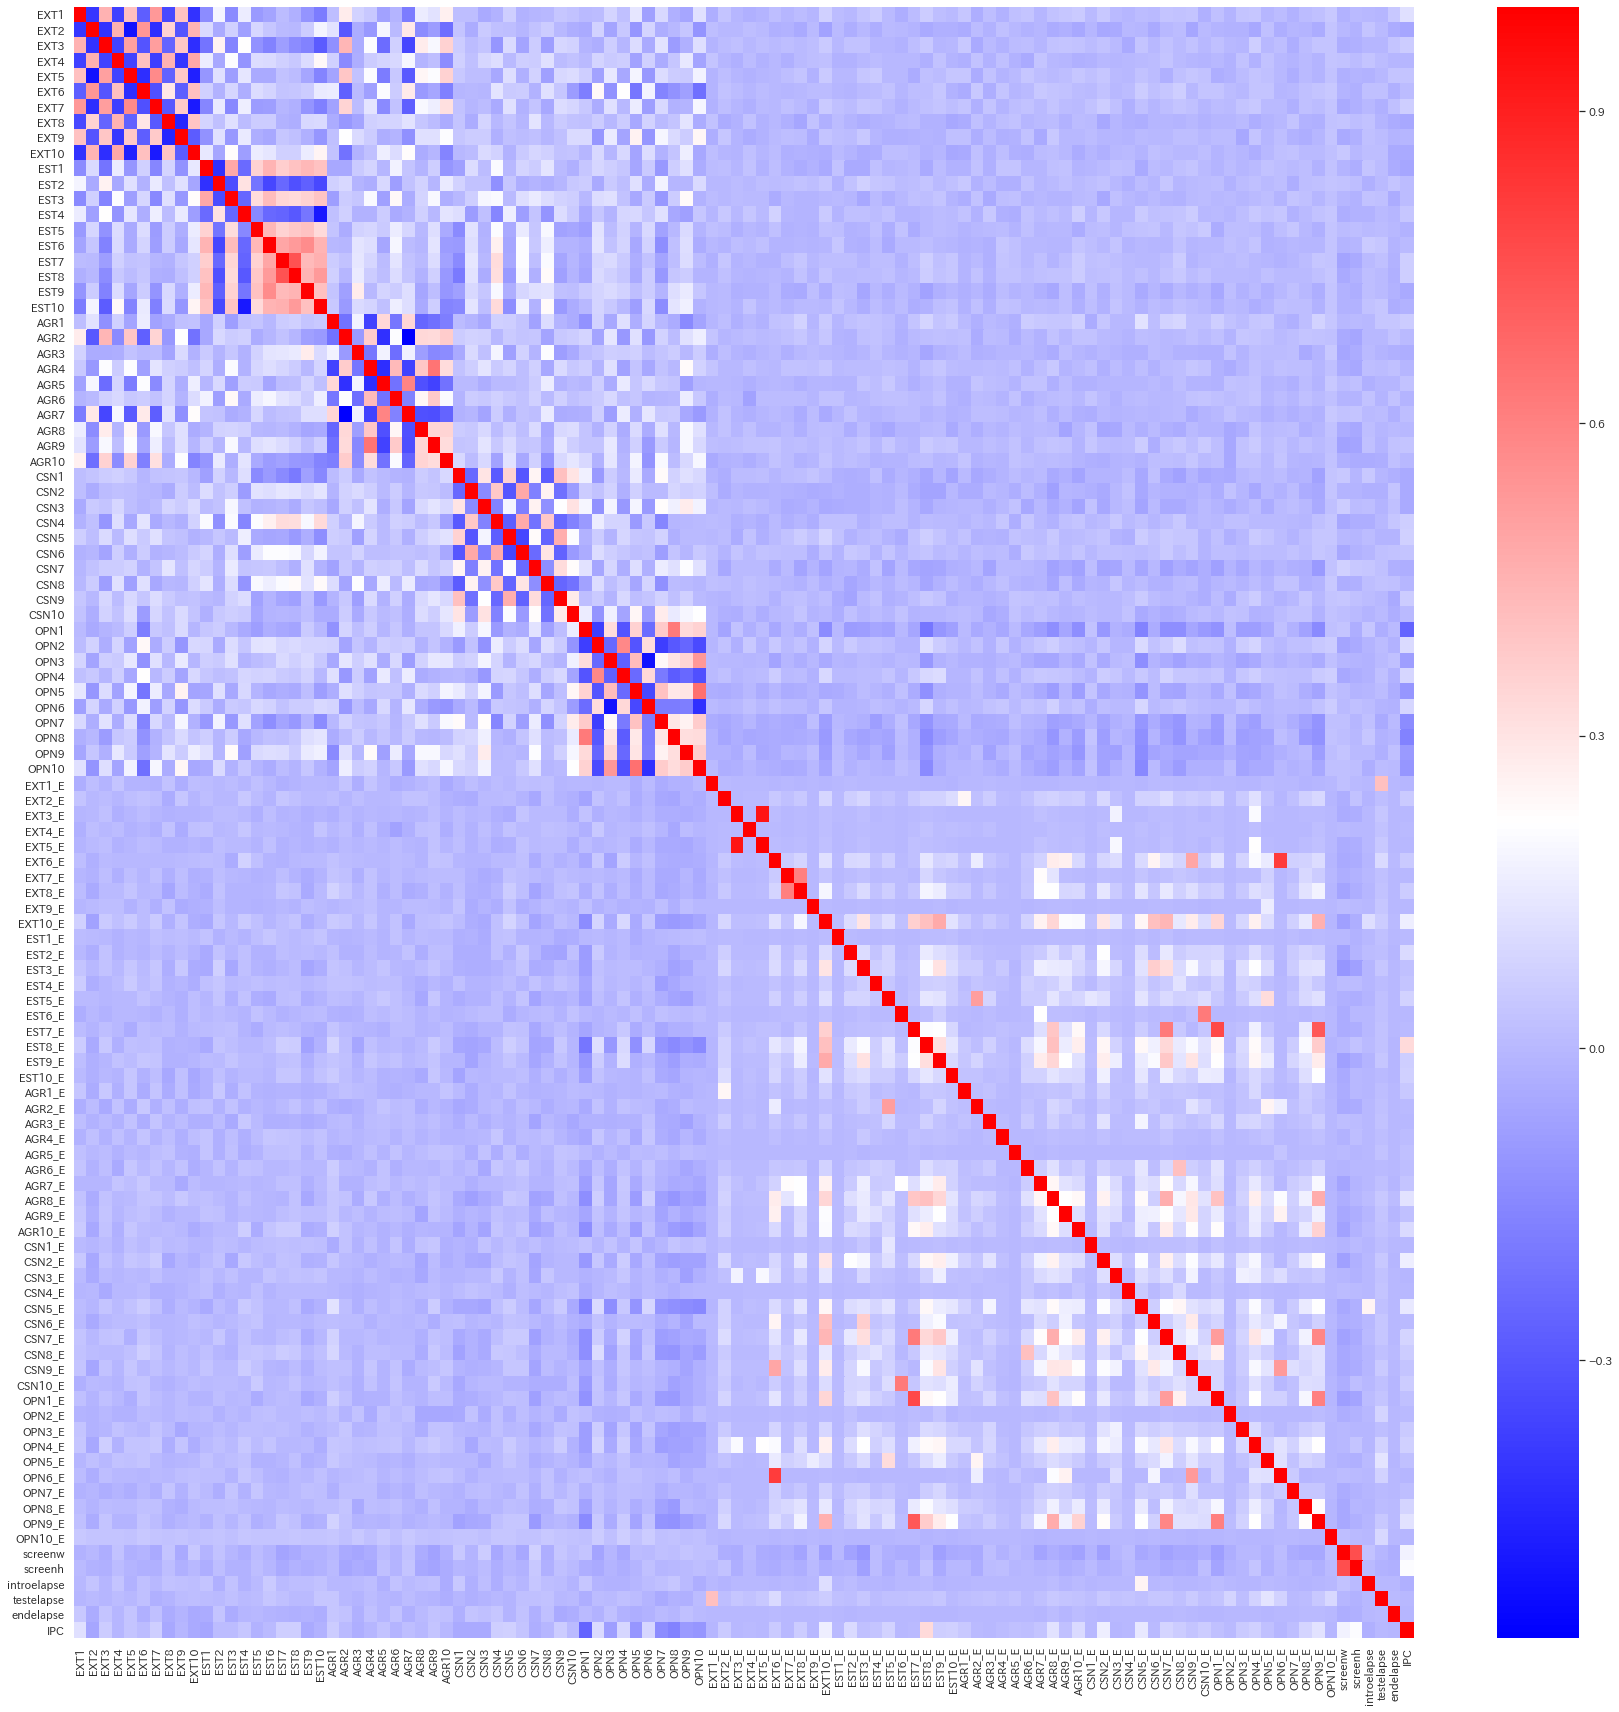

In [42]:
plt.figure(figsize=(30,30))
sns.heatmap(
    data = df.corr()
    , annot = False
    , cmap = 'bwr' # bwr, hot, Blue
)

#### アンケートカラム 相関分析

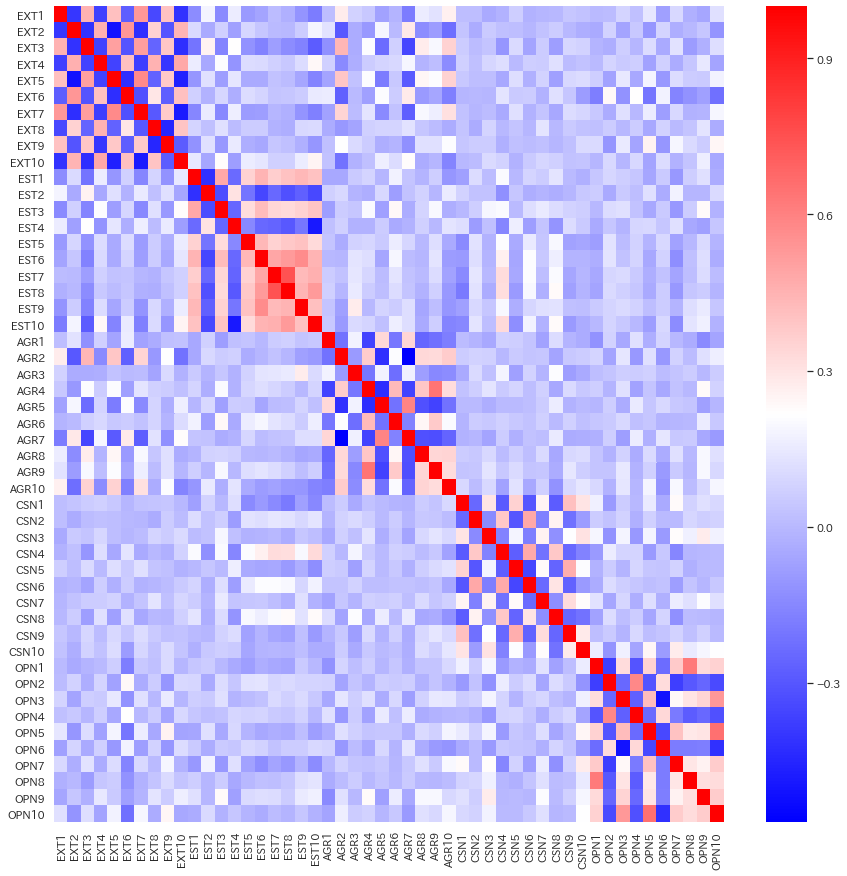

In [44]:
plt.figure(figsize=(15,15))
sns.heatmap(
    data = df.loc[:,  'EXT1':'OPN10'].corr()
    , annot = False
    , cmap = 'bwr' # bwr, hot, Blue
)

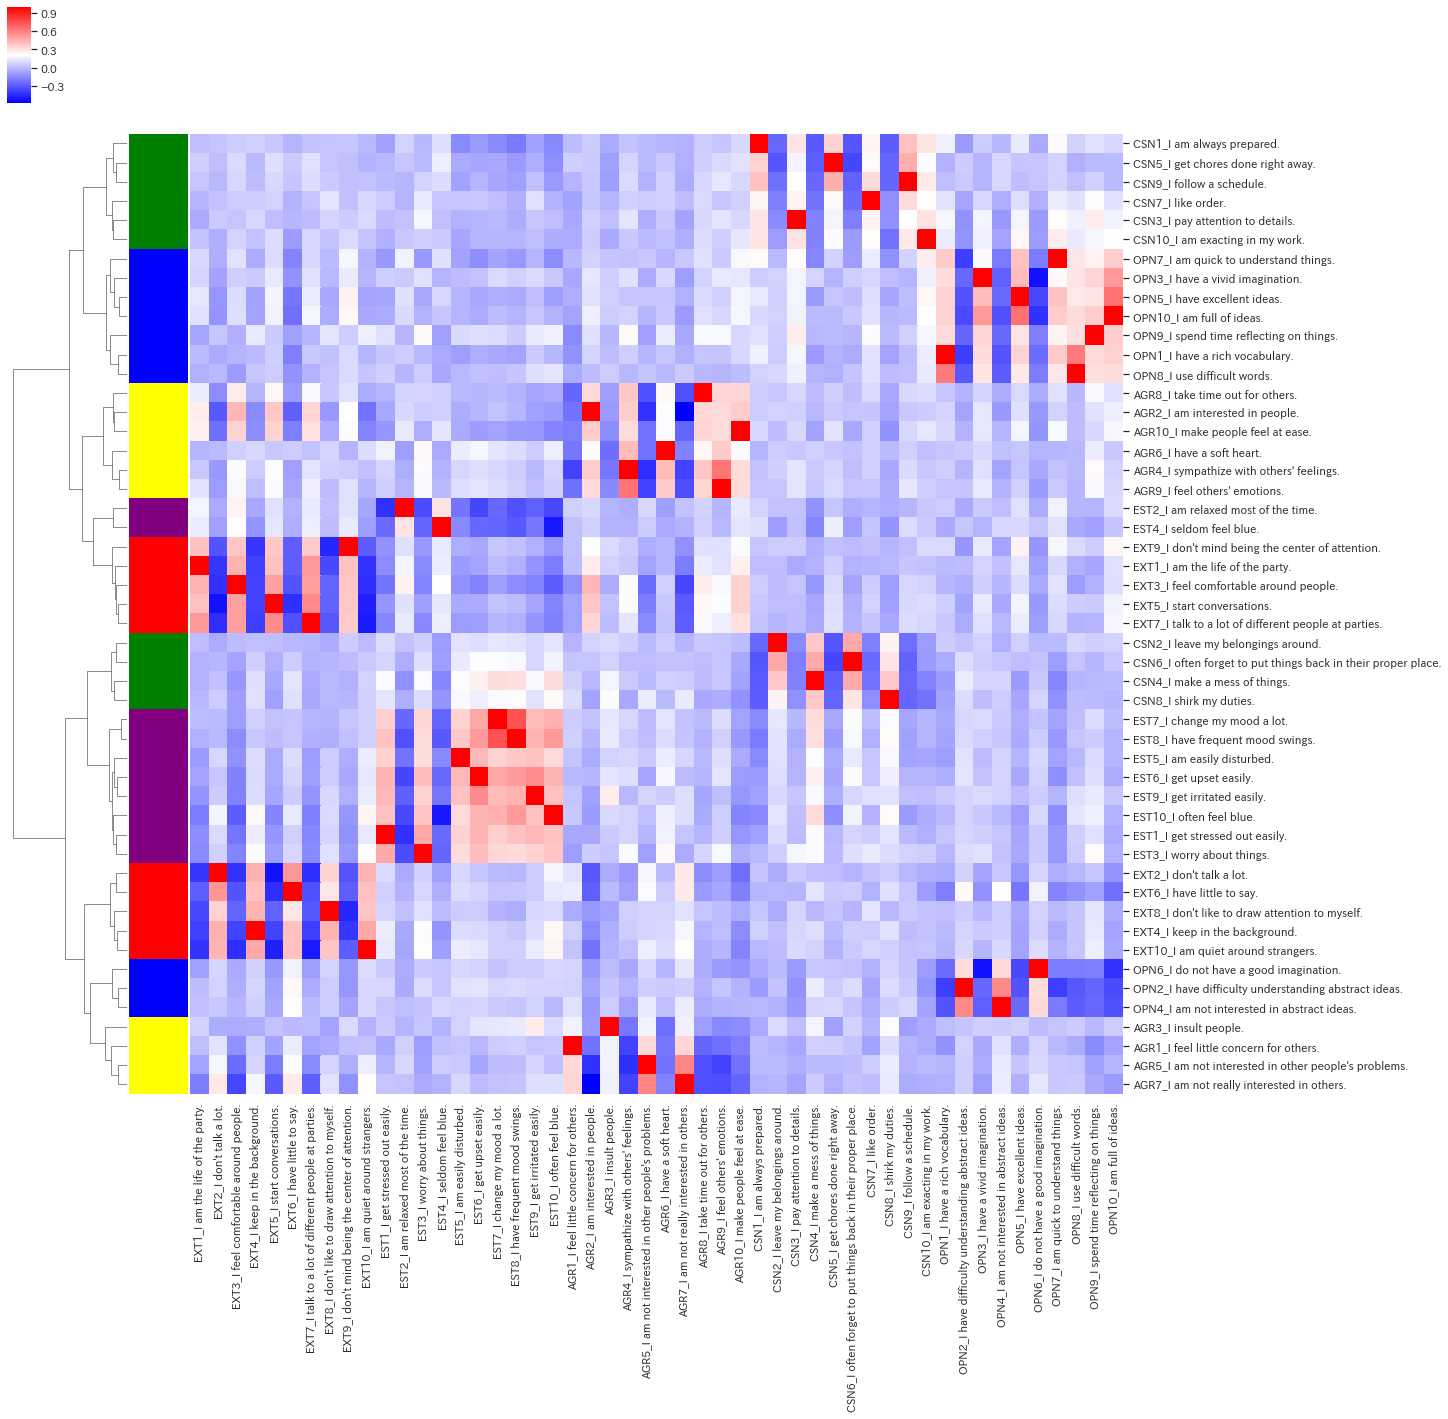

In [57]:
sns.clustermap(
    data = df.loc[:,  'EXT1':'OPN10'].rename(columns={
        "EXT1": "EXT1_I am the life of the party.",
        "EXT2": "EXT2_I don't talk a lot.",
        "EXT3": "EXT3_I feel comfortable around people.",
        "EXT4": "EXT4_I keep in the background.",
        "EXT5": "EXT5_I start conversations.",
        "EXT6": "EXT6_I have little to say.",
        "EXT7": "EXT7_I talk to a lot of different people at parties.",
        "EXT8": "EXT8_I don't like to draw attention to myself.",
        "EXT9": "EXT9_I don't mind being the center of attention.",
        "EXT10": "EXT10_I am quiet around strangers.",
        "EST1": "EST1_I get stressed out easily.",
        "EST2": "EST2_I am relaxed most of the time.",
        "EST3": "EST3_I worry about things.",
        "EST4": "EST4_I seldom feel blue.",
        "EST5": "EST5_I am easily disturbed.",
        "EST6": "EST6_I get upset easily.",
        "EST7": "EST7_I change my mood a lot.",
        "EST8": "EST8_I have frequent mood swings.",
        "EST9": "EST9_I get irritated easily.",
        "EST10": "EST10_I often feel blue.",
        "AGR1": "AGR1_I feel little concern for others.",
        "AGR2": "AGR2_I am interested in people.",
        "AGR3": "AGR3_I insult people.",
        "AGR4": "AGR4_I sympathize with others' feelings.",
        "AGR5": "AGR5_I am not interested in other people's problems.",
        "AGR6": "AGR6_I have a soft heart.",
        "AGR7": "AGR7_I am not really interested in others.",
        "AGR8": "AGR8_I take time out for others.",
        "AGR9": "AGR9_I feel others' emotions.",
        "AGR10": "AGR10_I make people feel at ease.",
        "CSN1": "CSN1_I am always prepared.",
        "CSN2": "CSN2_I leave my belongings around.",
        "CSN3": "CSN3_I pay attention to details.",
        "CSN4": "CSN4_I make a mess of things.",
        "CSN5": "CSN5_I get chores done right away.",
        "CSN6": "CSN6_I often forget to put things back in their proper place.",
        "CSN7": "CSN7_I like order.",
        "CSN8": "CSN8_I shirk my duties.",
        "CSN9": "CSN9_I follow a schedule.",
        "CSN10": "CSN10_I am exacting in my work.",
        "OPN1": "OPN1_I have a rich vocabulary.",
        "OPN2": "OPN2_I have difficulty understanding abstract ideas.",
        "OPN3": "OPN3_I have a vivid imagination.",
        "OPN4": "OPN4_I am not interested in abstract ideas.",
        "OPN5": "OPN5_I have excellent ideas.",
        "OPN6": "OPN6_I do not have a good imagination.",
        "OPN7": "OPN7_I am quick to understand things.",
        "OPN8": "OPN8_I use difficult words.",
        "OPN9": "OPN9_I spend time reflecting on things.",
        "OPN10": "OPN10_I am full of ideas."
    }).corr()
    , method='ward'
    , metric='euclidean'
    , annot = False
    , col_cluster = False
    , row_colors = ['red'] * 10 + ['purple'] * 10 + ['yellow'] * 10 + ['green'] * 10 + ['blue'] * 10
                         # EXT/外向性, EST/神経性, AGR/快楽性, CSN/誠実性, OPN/開放性
    , cmap = 'bwr' # bwr, hot, Blue
    , figsize=(20,20)
)